In [31]:
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Uploading dataset
df=pd.read_csv('50_Startups.csv')

In [5]:
# Displaying first 5 rows
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
# For description of columns 
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
# Checking if any value is null?
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No null therefore no cleanup is required.

For preprocessing of data we will perform the following steps:
1) Since the State column contains alphanumeric characters, we cannot accept that as machine can only understand numbers.
2) Checking the correlation matrix for knowing which columns are related the most to each other.
3) Making a plot between values of all columns.

In [11]:
# For getting the unique values of State column
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [16]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
df['State']= label_encoder.fit_transform(df['State'])

In [17]:
# Now again getting unique values of State column
df['State'].unique()

array([2, 0, 1], dtype=int64)

In [19]:
df.head(5)
#Our first problem is solved.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Now making a correlation matrix

In [32]:
# using corr() from pandas library for matrix correlation.
matrix = df.corr()
matrix

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


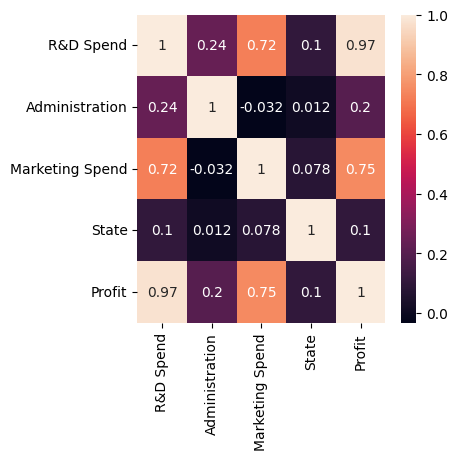

In [35]:
# Heatmap for Correlation between the columns
plt.figure(figsize=(4,4))
ax = sns.heatmap(matrix, annot=True)

Lastly we will make a plot between all the columns of dataset 50_Startups with state

<Axes: xlabel='Administration'>

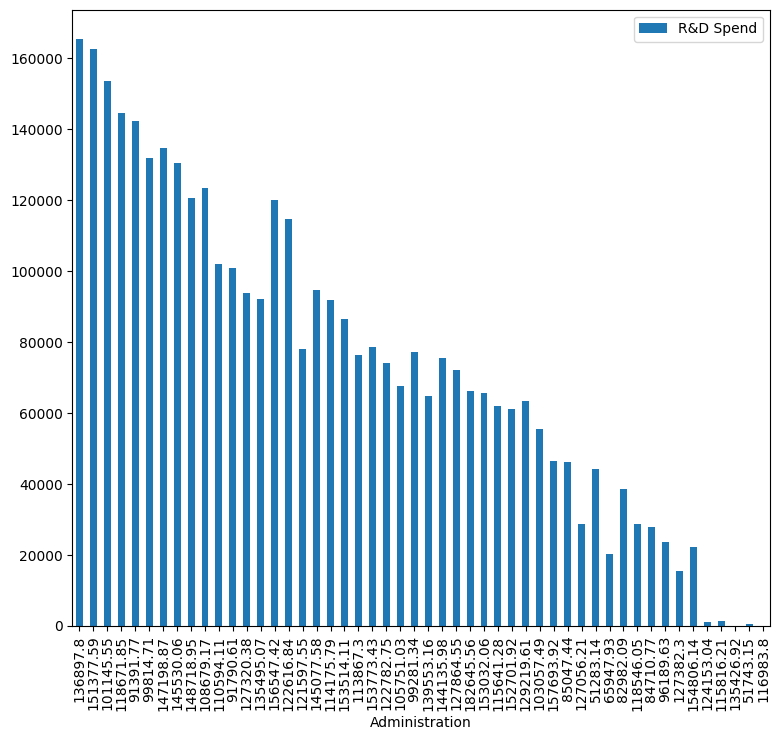

In [42]:
# Plot between Administraion and R&D spend
df.plot(x="Administration", y=["R&D Spend"], kind="bar", figsize=(9, 8))


<Axes: xlabel='Administration'>

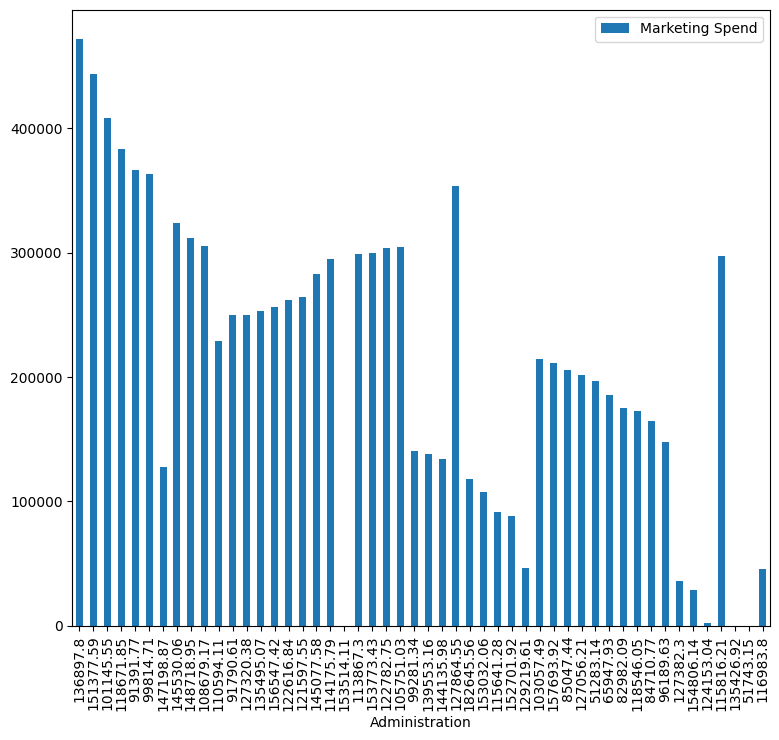

In [39]:
# Plot between Administraion and Marketing spend
df.plot(x="Administration", y=["Marketing Spend"], kind="bar", figsize=(9, 8))

Similarly We can do all the plots for the columns.
Now the data is pre processed for machine learning.